In [ ]:
# Uncomment if running from Google Colab
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
%cd gdrive/MyDrive/Masters_Project
%pip install -e peratouch

In [1]:
from peratouch.routines import run_network
from peratouch.data import load_data
from peratouch.config import path_five_users_main, path_five_users_first

In [2]:
from peratouch.networks import CNN
Xraw, yraw = load_data(path_five_users_main)
_ = run_network(CNN, Xraw, yraw, n_ch=1, n_epochs=100, n_folds=10, n_runs=10, plots=False, n_batches=15, random_resampling=False)



-- New Fold --
Train, test and validation arrays normalized to:
[1.], [0.9994], [0.9998]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106425, 1, 32) 
Labels shape:  (106425,) 
Shape of test set: (10643, 1, 32) 
Shape of train set: (91375, 1, 32) 
Shape of validation set: (14368, 1, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.18, 0.22, 0.2, 0.17] 
Fraction of validation labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.2, 0.2, 0.2, 0.2, 0.2] 
dtype of inputs:  torch.float32

 Start of training model:

End of epoch 1: loss_tr=1.037, loss_val=1.051, train=59.9%, val=59.3%
End of epoch 2: loss_tr=1.037, loss_val=1.067, train=60.8%, val=59.8%
End of epoch 3: loss_tr=0.975, loss_val=0.986, train=61.8%, val=61.1%
End of epoch 4: loss_tr=0.902, loss_val=0.932, train=66.0%, val=64.7%
End of epoch 5: loss_tr=0.886, loss_val=0.896, train=65.6%, val=65.4%
End of epoch 6: loss_tr=0.897, loss_val=0.912, train=64.2%, val=64.2%
End of ep



-- New Fold --
Train, test and validation arrays normalized to:
[1.], [1.0006], [0.9997]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106425, 1, 32) 
Labels shape:  (106425,) 
Shape of test set: (21285, 8, 4) 
Shape of train set: (72369, 8, 4) 
Shape of validation set: (12771, 8, 4) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.23, 0.18, 0.2, 0.21, 0.16] 
Fraction of train labels:  [0.22, 0.19, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32

 Start of training model:

End of epoch 1: loss_tr=1.573, loss_val=1.572, train=35.2%, val=35.3%
End of epoch 3: loss_tr=1.413, loss_val=1.411, train=44.4%, val=45.1%
End of epoch 5: loss_tr=1.335, loss_val=1.332, train=46.4%, val=47.2%
End of epoch 7: loss_tr=1.291, loss_val=1.286, train=47.7%, val=48.5%
End of epoch 9: loss_tr=1.265, loss_val=1.258, train=47.8%, val=48.4%
End of epoch 11: loss_tr=1.224, loss_val=1.219, train=50.1%, val=50.6%
End of

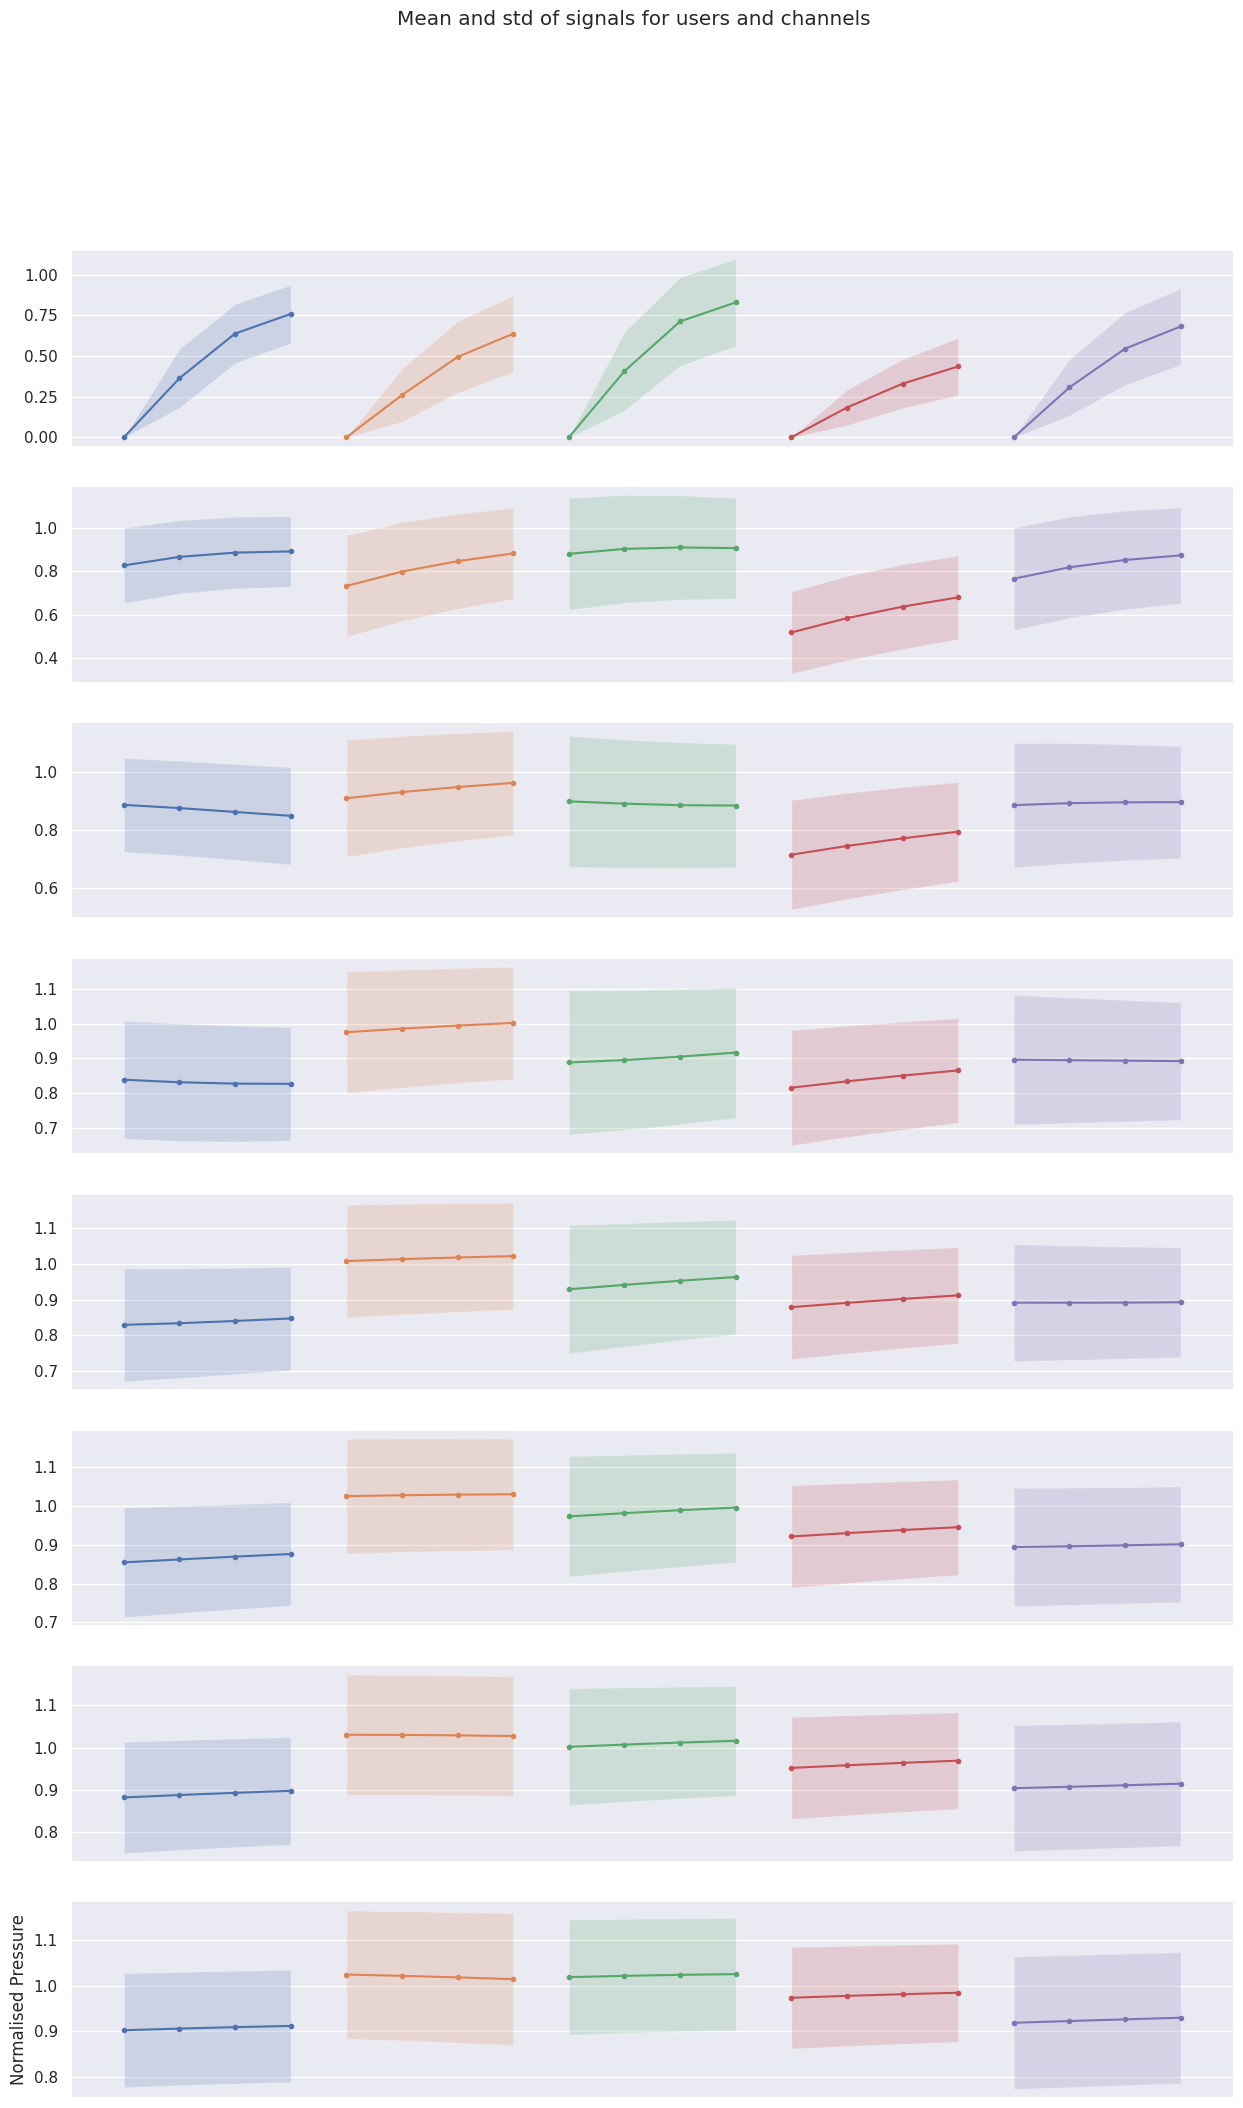

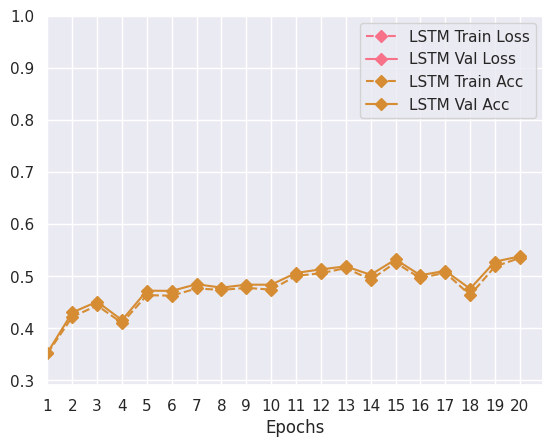

In [3]:
from peratouch.networks import LSTM 
Xraw, yraw = load_data(path_five_users_main)
_ = run_network(LSTM, Xraw, yraw, input_size=16, hidden_size=16, n_ch=1, n_epochs=100, n_folds=10, n_runs=10, plots=False, n_batches=15, random_resampling=False)

In [ ]:
from peratouch.networks import CNN_LSTM 
Xraw, yraw = load_data(path_five_users_main)
_ = run_network(CNN_LSTM, Xraw, yraw, n_ch=1, n_epochs=100, n_folds=10, n_runs=10, plots=False, n_batches=15, random_resampling=False)

In [ ]:
# Ran this routine only once for a simple comparison
## Run comparison of input sizes of LSTM
from peratouch.config import path_analysis_results
from datetime import date
from peratouch.networks import LSTM 
import numpy as np

Xraw, yraw = load_data(path_five_users_main)

input_sizes = [1, 2, 4, 8, 16, 32]
results = {}
for in_size in input_sizes:
    print('----- input size = ', in_size, "\n")
    results[str(in_size)] = run_network(LSTM, Xraw, yraw, input_size=in_size, hidden_size=16, n_ch=1, n_epochs=50, n_folds=5, n_runs=5, plots=False, n_batches=15, random_resampling=False)

save_path = str(path_analysis_results/f'input_size_lstm_{date.today()}.npz')
np.savez(save_path, **results)

data = np.load(save_path)
x = [int(k) for k in data]
y = [np.mean(vals==preds) for (vals, preds) in data.values()]
import matplotlib.pyplot as plt 
plt.plot(x, y)